<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-the-data" data-toc-modified-id="Load-the-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load the data</a></span></li><li><span><a href="#Statistical-Description" data-toc-modified-id="Statistical-Description-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Statistical Description</a></span></li><li><span><a href="#Create-profile-of-whole-dataframe" data-toc-modified-id="Create-profile-of-whole-dataframe-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Create profile of whole dataframe</a></span></li><li><span><a href="#Profile-of-two-variables" data-toc-modified-id="Profile-of-two-variables-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Profile of two variables</a></span></li><li><span><a href="#Correlation" data-toc-modified-id="Correlation-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Correlation</a></span></li></ul></div>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
sns.set(context='notebook', style='whitegrid', rc={'figure.figsize': (12,8)})
plt.style.use('ggplot') # better than sns styles.
matplotlib.rcParams['figure.figsize'] = 12,8

import os
import time

# random state
SEED=100
np.random.seed(SEED)

# Jupyter notebook settings for pandas
#pd.set_option('display.float_format', '{:,.2g}'.format) # numbers sep by comma
pd.options.display.float_format = '{:,.5f}'.format # df.A.value_counts().astype(float)
from pandas.api.types import CategoricalDtype
np.set_printoptions(precision=3)

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100) # None for all the rows
pd.set_option('display.max_colwidth', 200)

import IPython
from IPython.display import display, HTML, Image, Markdown

print([(x.__name__,x.__version__) for x in [np, pd,sns,matplotlib]])

[('numpy', '1.17.4'), ('pandas', '0.25.3'), ('seaborn', '0.9.0'), ('matplotlib', '3.1.2')]


In [0]:
import pandas_profiling

In [3]:
!pip freeze | grep pandas

pandas==0.25.3
pandas-datareader==0.7.4
pandas-gbq==0.11.0
pandas-profiling==2.3.0
sklearn-pandas==1.8.0


In [0]:
%%capture
# capture will not print in notebook

import os
import sys
ENV_COLAB = 'google.colab' in sys.modules

if ENV_COLAB:
    ## mount google drive
    from google.colab import drive
    drive.mount('/content/drive')
    dat_dir = 'drive/My Drive/Colab Notebooks/data/'
    sys.path.append(dat_dir)

    # Image dir
    img_dir = 'drive/My Drive/Colab Notebooks/images/'
    if not os.path.isdir(img_dir): os.makedirs(img_dir)
    sys.path.append(img_dir)

    # Output dir
    out_dir = 'drive/My Drive/Colab Notebooks/outputs/'
    if not os.path.isdir(out_dir): os.makedirs(out_dir)
    sys.path.append(out_dir)

    # Also install my custom module
    module_dir = 'drive/My Drive/Colab Notebooks/Bhishan_Modules/' 
    sys.path.append(module_dir)
    !cd drive/My Drive/Colab Notebooks/Bhishan_Modules/
    !pip install -e bhishan
    !cd -

    # pip install
    #!pip install pyldavis
    # !pip install hyperopt
    # !pip install catboost
    # !pip install shap
    # !pip install eli5
    #!pip install lime
    #!pip install category_encoders # TargetEncoder
    #!pip install optuna # hyper param opt

    # faster pandas
    # df['x'].swifter.apply(myfunc)
    # df[['x','y']].swifter.apply(myfunc,pos_arg,keyword_arg=mykeyword_arg)
    # !pip install swifter
    
    # update modules
    # ** If we update any module   **
    # **we need to restart runtime **
    #
    # !pip install -U scikit-learn
    # default is: pandas-profiling==1.4.1
    !pip install -U pandas-profiling


    # Note: We need to restart kernel to use tqdm
    # from tqdm.notebook import trange, tqdm
    # tqdm.pandas()
    # out = df['A'].progress_apply(myfunc)
    # !pip install -U tqdm

    # print
    print('Environment: Google Colaboratory.')

In [5]:
!pip freeze | grep pandas

pandas==0.25.3
pandas-datareader==0.7.4
pandas-gbq==0.11.0
pandas-profiling==2.3.0
sklearn-pandas==1.8.0


In [0]:
def show_method_attributes(obj, ncols=7,start=None, inside=None):
    """ Show all the attributes of a given method.
    Example:
    ========
    show_method_attributes(list)
     """

    print(f'Object Type: {type(obj)}\n')
    lst = [elem for elem in dir(obj) if elem[0]!='_' ]
    lst = [elem for elem in lst 
           if elem not in 'os np pd sys time psycopg2'.split() ]

    if isinstance(start,str):
        lst = [elem for elem in lst if elem.startswith(start)]
        
    if isinstance(start,tuple) or isinstance(start,list):
        lst = [elem for elem in lst for start_elem in start
               if elem.startswith(start_elem)]
        
    if isinstance(inside,str):
        lst = [elem for elem in lst if inside in elem]
        
    if isinstance(inside,tuple) or isinstance(inside,list):
        lst = [elem for elem in lst for inside_elem in inside
               if inside_elem in elem]

    return pd.DataFrame(np.array_split(lst,ncols)).T.fillna('')

# Load the data

In [7]:
ifile = dat_dir + '/flux/processed_0.h5'
df = pd.read_hdf(ifile,key='processed')
print(df.shape)
display(df.info(verbose=False, memory_usage="deep"))

df.head()

(6830, 47)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6830 entries, 6 to 7572
Columns: 47 entries, # calib_detected to base_ClassificationExtendedness_value
dtypes: float32(35), int8(12)
memory usage: 1.0 MB


None

# calib_detected  deblend_deblendedAsPsf  deblend_tooManyPeaks  \
6                  0                       0                     1   
7                  0                       0                     1   
14                 0                       0                     1   
16                 0                       0                     1   
21                 0                       0                     0   

    deblend_rampedTemplate  base_SdssShape_flag  base_SdssShape_flag_shift  \
6                        0                    0                          0   
7                        0                    0                          0   
14                       0                    0                          0   
16                       0                    0                          0   
21                       0                    0                          0   

    ext_shapeHSM_HsmShapeRegauss_flag  \
6                                   1   
7                                   1   
14                                  1   
16                                  1   
21                                  1   

    ext_shapeHSM_HsmShapeRegauss_flag_parent_source  \
6                                                 1   
7                                                 1   
14                                                1   
16                                                1   
21                                                0   

    ext_shapeHSM_HsmShapeRegauss_flag_galsim  base_PixelFlags_flag_edge  \
6                                          0                          1   
7                                          0                          1   
14                                         0                          1   
16                                         0                          1   
21                                         1                          1   

    base_Variance_flag  base_Variance_flag_emptyFootprint  coord_ra  \
6                    0                                  0   0.00190   
7                    0                                  0   0.00180   
14                   0                                  0   0.00060   
16                   0                                  0   0.00250   
21                   0                                  0   0.00100   

    coord_dec  parent  deblend_nChild  base_GaussianCentroid_x  \
6     0.00000 0.00000         3.00000              1,671.94788   
7     0.00000 0.00000         2.00000              1,782.08545   
14    0.00010 0.00000         3.00000              2,952.80908   
16    0.00000 0.00000         3.00000                989.68817   
21    0.00000 0.00000         0.00000              2,529.72803   

    base_GaussianCentroid_y  base_NaiveCentroid_x  base_NaiveCentroid_y  \
6                  28.21710           1,671.06567              27.98990   
7                  32.91540           1,782.01184              32.06270   
14                 53.15800           2,952.04956              53.00670   
16                 26.52890             989.02551              26.02550   
21                 22.63060           2,529.06274              22.03700   

    base_SdssCentroid_x  base_SdssCentroid_y  base_SdssCentroid_xSigma  \
6           1,671.93860             28.14400                   0.08690   
7           1,782.11963             32.81840                   0.08670   
14          2,952.82861             53.12920                   0.04420   
16            989.90411             26.55640                   0.05510   
21          2,529.73438             22.62840                   0.07120   

    base_SdssCentroid_ySigma  base_SdssShape_xx  base_SdssShape_yy  \
6                    0.08770           11.42790           11.29140   
7                    0.09010           11.54210           12.42220   
14                   0.04250           12.85160           11.76920   
16                   0.04490           75.09270           15.56080   
21             

In [8]:
df.columns.to_numpy()

array(['# calib_detected', 'deblend_deblendedAsPsf',
       'deblend_tooManyPeaks', 'deblend_rampedTemplate',
       'base_SdssShape_flag', 'base_SdssShape_flag_shift',
       'ext_shapeHSM_HsmShapeRegauss_flag',
       'ext_shapeHSM_HsmShapeRegauss_flag_parent_source',
       'ext_shapeHSM_HsmShapeRegauss_flag_galsim',
       'base_PixelFlags_flag_edge', 'base_Variance_flag',
       'base_Variance_flag_emptyFootprint', 'coord_ra', 'coord_dec',
       'parent', 'deblend_nChild', 'base_GaussianCentroid_x',
       'base_GaussianCentroid_y', 'base_NaiveCentroid_x',
       'base_NaiveCentroid_y', 'base_SdssCentroid_x',
       'base_SdssCentroid_y', 'base_SdssCentroid_xSigma',
       'base_SdssCentroid_ySigma', 'base_SdssShape_xx',
       'base_SdssShape_yy', 'base_SdssShape_xy', 'base_SdssShape_xxSigma',
       'base_SdssShape_yySigma', 'base_SdssShape_xySigma',
       'base_SdssShape_x', 'base_SdssShape_y', 'base_SdssShape_psf_xx',
       'base_SdssShape_psf_yy', 'base_SdssShape_psf_xy',


# Statistical Description

In [9]:
df.describe()

# calib_detected  deblend_deblendedAsPsf  deblend_tooManyPeaks  \
count       6,830.00000             6,830.00000           6,830.00000   
mean            0.06047                 0.38053               0.14905   
std             0.23837                 0.48555               0.35616   
min             0.00000                 0.00000               0.00000   
25%             0.00000                 0.00000               0.00000   
50%             0.00000                 0.00000               0.00000   
75%             0.00000                 1.00000               0.00000   
max             1.00000                 1.00000               1.00000   

       deblend_rampedTemplate  base_SdssShape_flag  base_SdssShape_flag_shift  \
count             6,830.00000          6,830.00000                6,830.00000   
mean                  0.00190              0.00586                    0.00586   
std                   0.04359              0.07631                    0.07631   
min                   0.00000              0.00000                    0.00000   
25%                   0.00000              0.00000                    0.00000   
50%                   0.00000              0.00000                    0.00000   
75%                   0.00000              0.00000                    0.00000   
max                   1.00000              1.00000                    1.00000   

       ext_shapeHSM_HsmShapeRegauss_flag  \
count                        6,830.00000   
mean                             0.50469   
std                              0.50001   
min                              0.00000   
25%                              0.00000   
50%                              1.00000   
75%                              1.00000   
max                              1.00000   

       ext_shapeHSM_HsmShapeRegauss_flag_parent_source  \
count                                      6,830.00000   
mean                                           0.14905   
std                                            0.35616   
min                                            0.00000   
25%                                            0.00000   
50%                                            0.00000   
75%                                            0.00000   
max                                            1.00000   

       ext_shapeHSM_HsmShapeRegauss_flag_galsim  base_PixelFlags_flag_edge  \
count                               6,830.00000                6,830.00000   
mean                                    0.35564                    0.01493   
std                                     0.47874                    0.12130   
min                                     0.00000                    0.00000   
25%                                     0.00000                    0.00000   
50%                                     0.00000                    0.00000   
75%                                     1.00000                    0.00000   
max                                     1.00000                    1.00000   

       base_Variance_flag  base_Variance_flag_emptyFootprint    coord_ra  \
count         6,830.00000                        6,830.00000 6,830.00000   
mean              0.13982                            0.13982     0.00184   
std               0.34683                            0.34683     0.00095   
min               0.00000                            0.00000     0.00020   
25%               0.00000                            0.00000     0.00100   
50%               0.00000                            0.00000     0.00180   
75%               0.00000                            0.00000     0.00270   
max               1.00000                            1.00000     0.00350   

        coord_dec      parent  deblend_nChild  base_GaussianCentroid_x  \
count 6,830.00000 6,830.00000     6,830.00000              6,830.00000   
mean      0.00166   858.12067         0.70776              1,700.90173   
std       0.00095   835.44513         2.30834                982.33002   
min       0.000

# Create profile of whole dataframe

In [10]:
df.profile_report(style={'full_width':True})

In [0]:
profile = df.profile_report(title='Pandas Profiling Report')
profile.to_file(output_file=out_dir + "/pandas_profiling_report.html")

In [0]:
profile = df.profile_report(title='Pandas Profiling Report', plot={'histogram': {'bins': 8}})
profile.to_file(output_file="output.html")

In [14]:
show_method_attributes(profile)

Object Type: <class 'pandas_profiling.__init__.ProfileReport'>



0                       1            2       3        4  \
0  description_set  get_rejected_variables         html  sample  to_file   
1  get_description    get_unique_file_name  minify_html   title            

         5                 6  
0  to_html  use_local_assets  
1

In [24]:
profile.get_rejected_variables(threshold=0.9)

['base_NaiveCentroid_x',
 'base_NaiveCentroid_y',
 'base_SdssCentroid_x',
 'base_SdssCentroid_y',
 'base_SdssCentroid_ySigma',
 'base_SdssShape_flag_shift',
 'base_SdssShape_psf_xy',
 'base_SdssShape_x',
 'base_SdssShape_y',
 'base_SdssShape_yySigma',
 'base_Variance_flag_emptyFootprint',
 'coord_dec',
 'ext_shapeHSM_HsmPsfMoments_xx',
 'ext_shapeHSM_HsmPsfMoments_xy',
 'ext_shapeHSM_HsmPsfMoments_yy',
 'ext_shapeHSM_HsmShapeRegauss_flag_parent_source',
 'ext_shapeHSM_HsmSourceMoments_x',
 'ext_shapeHSM_HsmSourceMoments_y',
 'parent']

In [0]:
# profile.get_description() # gives ugly long dictionary

In [0]:
# !open ../outputs/pandas_profiling_report.html

# Profile of two variables

In [17]:
profile2 = df[['base_SdssShape_x','base_GaussianFlux_flux']]\
  .profile_report(title='Pandas Profiling Report Two columns')

profile2

In [18]:
profile2.get_description()['table']

{'BOOL': 0,
 'CAT': 0,
 'CONST': 0,
 'CORR': 0,
 'DATE': 0,
 'NUM': 3,
 'PATH': 0,
 'RECODED': 0,
 'REJECTED': 0,
 'UNIQUE': 0,
 'UNSUPPORTED': 0,
 'URL': 0,
 'memsize': 109408,
 'n': 6830,
 'n_cells_missing': 0,
 'n_duplicates': 0,
 'n_vars_all_missing': 0,
 'n_vars_with_missing': 0,
 'nvar': 3,
 'p_cells_missing': 0.0,
 'p_duplicates': 0.0,
 'recordsize': 16.018740849194728}

In [19]:
pd.DataFrame(profile2.get_description()['table'],index=['base_SdssShape_x'])

n  nvar  memsize  recordsize  n_cells_missing  \
base_SdssShape_x  6830     3   109408    16.01874                0   

                  n_vars_with_missing  n_vars_all_missing  p_cells_missing  \
base_SdssShape_x                    0                   0          0.00000   

                  n_duplicates  p_duplicates  CAT  BOOL  NUM  DATE  URL  PATH  \
base_SdssShape_x             0       0.00000    0     0    3     0    0     0   

                  CONST  UNIQUE  UNSUPPORTED  CORR  RECODED  REJECTED  
base_SdssShape_x      0       0            0     0        0         0

# Correlation

In [20]:
df[['base_SdssShape_x','base_GaussianFlux_flux']].corr().style.background_gradient()

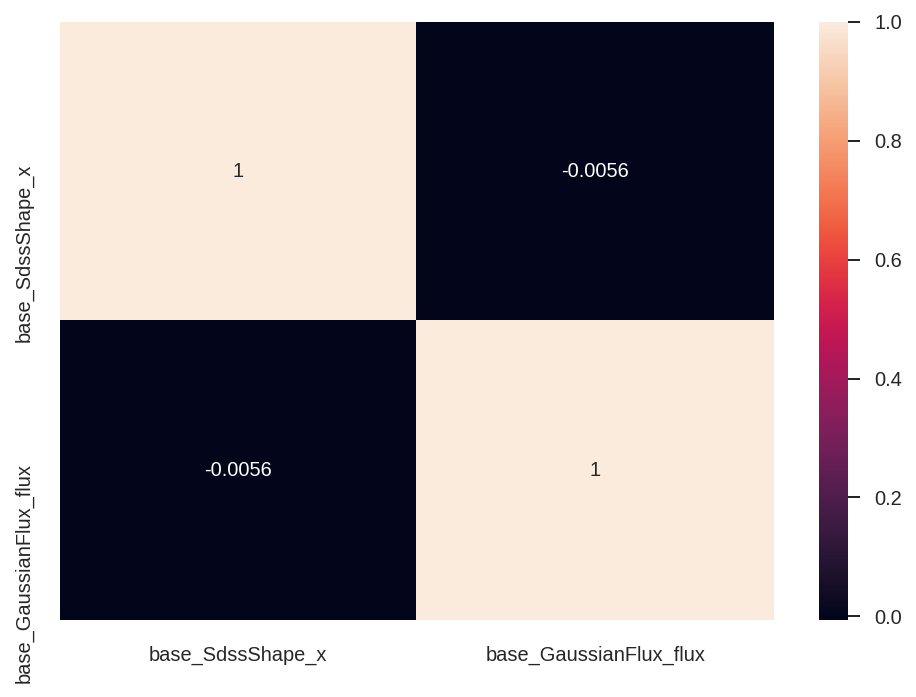

In [21]:
sns.heatmap(df['base_SdssShape_x base_GaussianFlux_flux'.split()].corr(), annot=True)